In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


In [19]:
%matplotlib inline

In [22]:
images = glob.glob('camera_cal/calibration*.jpg')

In [23]:
print(images)

['camera_cal/calibration1.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration9.jpg']


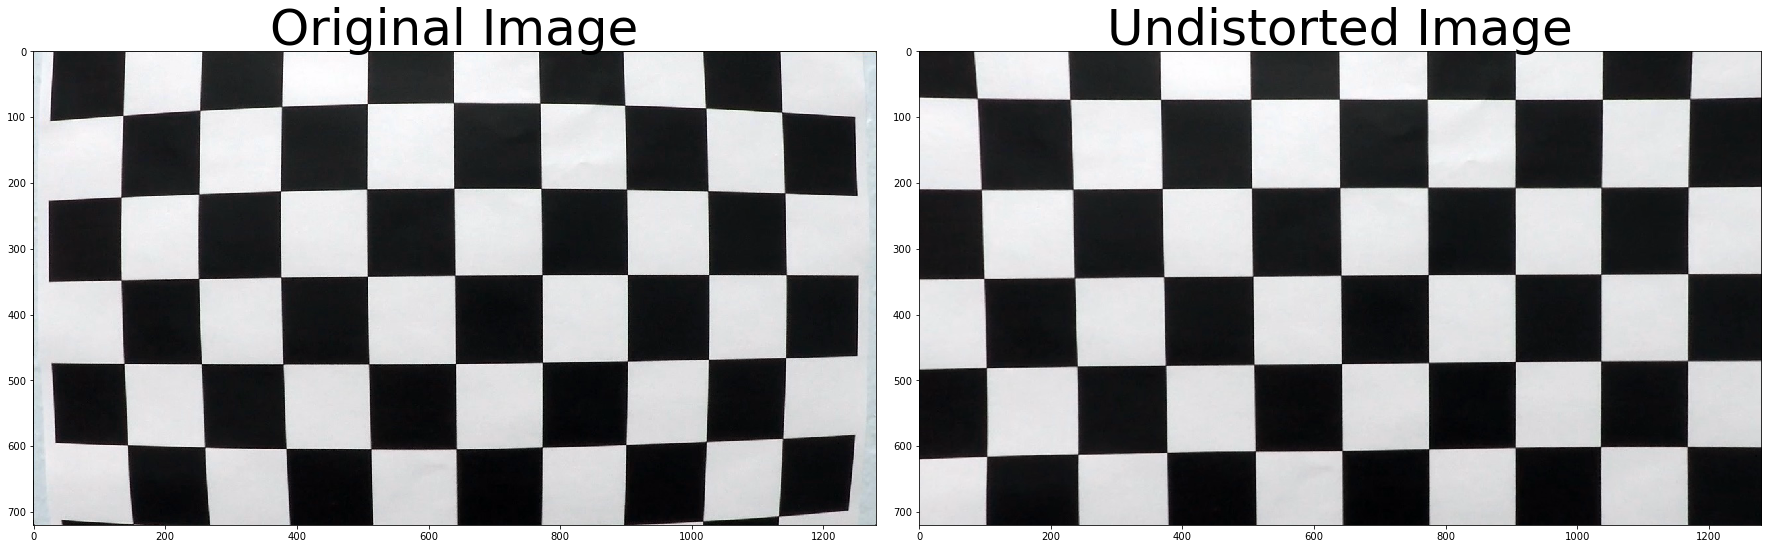

In [30]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y



objpoints = [] # 3d rw
imgpoints = [] # 2d img

# Init corner grid
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # I hate having to type all this

for file in images:
    img = cv2.imread(file)

    #Grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #Get corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    #Append corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

# 1, 2, 3, Calibrate!
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


#Generating a before/after test image
undist = cv2.undistort(img, mtx, dist)
test = cv2.imread('camera_cal/calibration1.jpg')
test_ud = cv2.undistort(test,mtx,dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(test_ud)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [24]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist,cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    #print(corners.shape)
    #print(corners)
    #print(undist.shape[0:2])
    # 4) If corners found: 
    if (ret == True):
            # a) draw corners
        undist = cv2.drawChessboardCorners(undist, (nx,ny), corners, ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
        src = np.float32([corners[0,::],corners[nx-3,::],corners[-3,::],corners[-nx,::]])
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        #dst = np.float32([[275,270],[585,270],[585,580],[275,580]])
        dst = np.float32([[100, 100], [img.shape[0]-100, 100], 
                                     [img.shape[0]-100, img.shape[1]-100], 
                                     [100, img.shape[1]-100]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    M = cv2.getPerspectiveTransform(src,dst)
    warped = cv2.warpPerspective(undist,M,(img.shape[1],img.shape[0]),flags=cv2.INTER_LINEAR)
    #print(warped.shape, undist.shape, M.shape)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

SyntaxError: invalid syntax (<ipython-input-24-ef60ec3a851c>, line 9)